In [29]:
import tensorflow
from tensorflow import keras

In [30]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels)=imdb.load_data(num_words=10000)

In [31]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
                        results = np.zeros((len(sequences), dimension))
                        for i, sequence in enumerate (sequences):
                            results[i, sequence] = 1.
                        return results                     

In [32]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [33]:
train_labels

array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

In [34]:
train_labels.shape

(25000,)

In [35]:
y_train =np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [36]:
x_train

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

In [37]:
y_test

array([0., 1., 1., ..., 0., 0., 0.], dtype=float32)

In [38]:
from tensorflow import keras 
from tensorflow.keras import layers
model = keras.Sequential([
 layers.Dense(16, activation="relu"),
 layers.Dense(16, activation="relu"),
 layers.Dense(1, activation="sigmoid")
])

In [39]:
model.compile(optimizer="rmsprop",
 loss="binary_crossentropy",
 metrics=["accuracy"])

In [40]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [41]:
history = model.fit(partial_x_train,
 partial_y_train,
 epochs=20,
 batch_size=512,
 validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 35ms/step - loss: 0.5266 - accuracy: 0.7770 - val_loss: 0.4108 - val_accuracy: 0.8513
Epoch 2/20
30/30 [==============================] - 0s 12ms/step - loss: 0.3248 - accuracy: 0.8940 - val_loss: 0.3139 - val_accuracy: 0.8866
Epoch 3/20
30/30 [==============================] - 0s 12ms/step - loss: 0.2443 - accuracy: 0.9191 - val_loss: 0.2851 - val_accuracy: 0.8888
Epoch 4/20
30/30 [==============================] - 0s 13ms/step - loss: 0.1957 - accuracy: 0.9353 - val_loss: 0.2754 - val_accuracy: 0.8895
Epoch 5/20
30/30 [==============================] - 0s 13ms/step - loss: 0.1644 - accuracy: 0.9459 - val_loss: 0.2778 - val_accuracy: 0.8864
Epoch 6/20
30/30 [==============================] - 0s 12ms/step - loss: 0.1388 - accuracy: 0.9572 - val_loss: 0.2857 - val_accuracy: 0.8851
Epoch 7/20
30/30 [==============================] - 0s 12ms/step - loss: 0.1205 - accuracy: 0.9619 - val_loss: 0.2911 - val_accuracy: 0.8850
Epoch 8/20
30

In [46]:
history_dic= history.history

In [47]:
history_dic

{'loss': [0.5265589952468872,
  0.32480859756469727,
  0.2442713975906372,
  0.19568094611167908,
  0.1644468605518341,
  0.138810396194458,
  0.12054793536663055,
  0.10238496959209442,
  0.0895775556564331,
  0.0782545730471611,
  0.06462123245000839,
  0.057833556085824966,
  0.047621652483940125,
  0.039757516235113144,
  0.030781446024775505,
  0.02989307977259159,
  0.025835609063506126,
  0.0194252897053957,
  0.017679372802376747,
  0.013667385093867779],
 'accuracy': [0.7770000100135803,
  0.8939999938011169,
  0.9191333055496216,
  0.9352666735649109,
  0.9458666443824768,
  0.9571999907493591,
  0.9619333148002625,
  0.9702666401863098,
  0.9737333059310913,
  0.979200005531311,
  0.9834666848182678,
  0.9855999946594238,
  0.9891999959945679,
  0.9916666746139526,
  0.9951333403587341,
  0.9938666820526123,
  0.996066689491272,
  0.9977999925613403,
  0.9977333545684814,
  0.9987333416938782],
 'val_loss': [0.4108316898345947,
  0.313884973526001,
  0.28509700298309326,
  0

In [48]:
history_dic.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

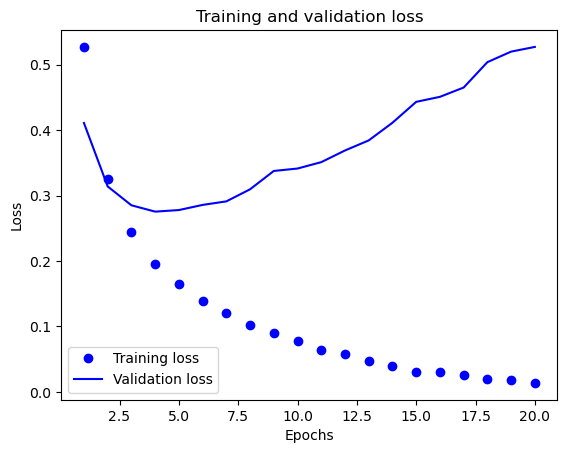

In [42]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss") 
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

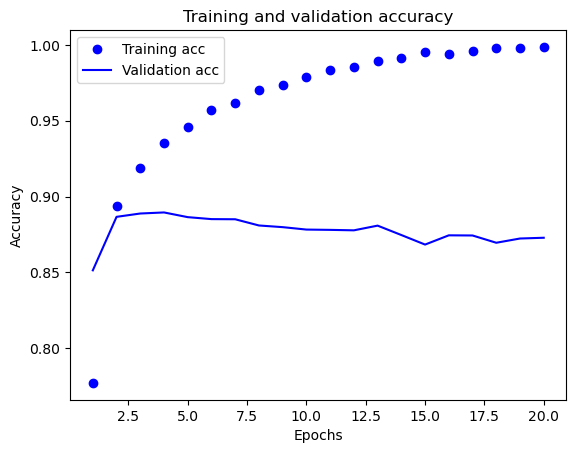

In [43]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [49]:
model = keras.Sequential([
 layers.Dense(16, activation="relu"),
 layers.Dense(16, activation="relu"),
 layers.Dense(1, activation="sigmoid")
 ])

In [50]:
model.compile(optimizer="rmsprop",
 loss="binary_crossentropy",
 metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 1s 8ms/step - loss: 0.4791 - accuracy: 0.8098
Epoch 2/4
49/49 [==============================] - 0s 8ms/step - loss: 0.2803 - accuracy: 0.9010
Epoch 3/4
49/49 [==============================] - 0s 8ms/step - loss: 0.2159 - accuracy: 0.9215
Epoch 4/4
782/782 [==============================] - 1s 2ms/step - loss: 0.2877 - accuracy: 0.8850


In [51]:
results= model.evaluate(x_test, y_test)

782/782 [==============================] - 1s 2ms/step - loss: 0.2877 - accuracy: 0.8850


In [52]:
results

[0.28773629665374756, 0.8849599957466125]

In [54]:
model.predict(x_test[0].reshape(1,10000))

1/1 [==============================] - 0s 88ms/step


array([[0.23153177]], dtype=float32)

In [55]:
y_test[0]

0.0

In [57]:
if model.predict(x_test[0].reshape(1,10000)) >0.5:
    print ('positive')
else:
    print ('Negative')

1/1 [==============================] - 0s 20ms/step
Negative


In [58]:
y_test[1]

1.0

In [59]:
review = input("input your review")

input your reviewwhat a movieee I really enjoyed all the scenes !!


In [60]:
from sklearn.feature_extraction.text import CountVectorizer

In [62]:
vectorizer = CountVectorizer(binary = True, ngram_range=(1,1))

# 2nd Example

In [63]:
from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
 num_words=10000)

2110848/2110848 [==============================] - 0s 0us/step


>>> len(train_data)
8982
>>> len(test_data)
2246

In [64]:
word_index = reuters.get_word_index()
reverse_word_index = dict(
 [(value, key) for (key, value) in word_index.items()])
decoded_newswire = " ".join(
 [reverse_word_index.get(i - 3, "?") for i in train_data[0]]) 

550378/550378 [==============================] - 0s 0us/step


In [65]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [90]:
x_test.size

22460000

In [71]:
def to_one_hot(labels, dimension = 46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results




In [72]:
y_train = to_one_hot(train_labels) 
y_test = to_one_hot(test_labels)

In [73]:
model = keras.Sequential([
 layers.Dense(64, activation="relu"),
 layers.Dense(64, activation="relu"),
 layers.Dense(46, activation="softmax")
])

In [74]:
model.compile(optimizer="rmsprop",
 loss="categorical_crossentropy",
 metrics=["accuracy"])


In [76]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

In [77]:
history = model.fit(partial_x_train,
partial_y_train,
epochs=20,
batch_size=512,
validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 34ms/step - loss: 2.7568 - accuracy: 0.4525 - val_loss: 1.8792 - val_accuracy: 0.5840
Epoch 2/20
16/16 [==============================] - 0s 19ms/step - loss: 1.5589 - accuracy: 0.6734 - val_loss: 1.4006 - val_accuracy: 0.6890
Epoch 3/20
16/16 [==============================] - 0s 18ms/step - loss: 1.1957 - accuracy: 0.7423 - val_loss: 1.2156 - val_accuracy: 0.7480
Epoch 4/20
16/16 [==============================] - 0s 20ms/step - loss: 0.9888 - accuracy: 0.7886 - val_loss: 1.0946 - val_accuracy: 0.7670
Epoch 5/20
16/16 [==============================] - 0s 18ms/step - loss: 0.8174 - accuracy: 0.8270 - val_loss: 1.0155 - val_accuracy: 0.7860
Epoch 6/20
16/16 [==============================] - 0s 18ms/step - loss: 0.6895 - accuracy: 0.8519 - val_loss: 0.9675 - val_accuracy: 0.7880
Epoch 7/20
16/16 [==============================] - 0s 19ms/step - loss: 0.5762 - accuracy: 0.8761 - val_loss: 0.9327 - val_accuracy: 0.7930
Epoch 8/20
16

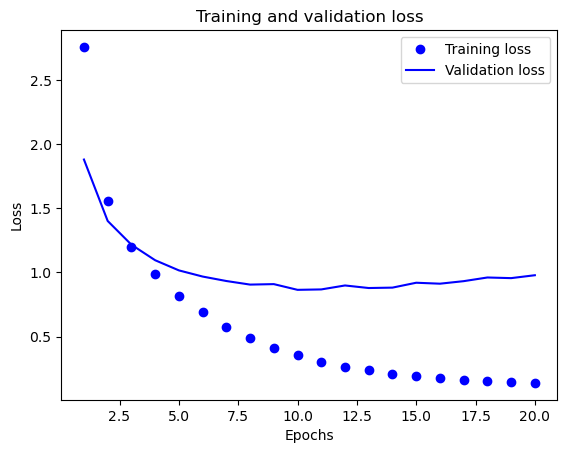

In [78]:
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [79]:
model = keras.Sequential([
     layers.Dense(64, activation="relu"),
     layers.Dense(64, activation="relu"),
     layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
 loss="categorical_crossentropy",
 metrics=["accuracy"])
model.fit(x_train,
 y_train,
 epochs=9,
 batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/9
18/18 [==============================] - 1s 17ms/step - loss: 2.6396 - accuracy: 0.4529
Epoch 2/9
18/18 [==============================] - 0s 16ms/step - loss: 1.5470 - accuracy: 0.6620
Epoch 3/9
18/18 [==============================] - 0s 16ms/step - loss: 1.1801 - accuracy: 0.7432
Epoch 4/9
18/18 [==============================] - 0s 16ms/step - loss: 0.9568 - accuracy: 0.7984
Epoch 5/9
18/18 [==============================] - 0s 16ms/step - loss: 0.7898 - accuracy: 0.8300
Epoch 6/9
18/18 [==============================] - 0s 16ms/step - loss: 0.6539 - accuracy: 0.8607
Epoch 7/9
18/18 [==============================] - 0s 16ms/step - loss: 0.5460 - accuracy: 0.8832
Epoch 8/9
18/18 [==============================] - 0s 16ms/step - loss: 0.4613 - accuracy: 0.9028
Epoch 9/9
71/71 [==============================] - 0s 2ms/step - loss: 0.8990 - accuracy: 0.7903


In [80]:
results

[0.8990213871002197, 0.7902938723564148]

In [98]:
predictions = model.predict(x_test)

71/71 [==============================] - 0s 2ms/step


In [99]:
>>> import copy
>>> test_labels_copy = copy.copy(test_labels)
>>> np.random.shuffle(test_labels_copy)
>>> hits_array = np.array(test_labels) == np.array(test_labels_copy)
>>> hits_array.mean()
0.18655387355298308


0.18655387355298308

In [100]:
predictions.shape

(2246, 46)

In [101]:
predictions[0].shape

(46,)

In [102]:
 np.sum(predictions[0])

1.0000002

In [103]:
 np.argmax(predictions[0])

3

In [106]:
y_test[0]

3

In [95]:
y_test[0]

3

In [87]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [88]:
model.compile(optimizer="rmsprop",
 loss="sparse_categorical_crossentropy",
 metrics=["accuracy"])

In [89]:
model = keras.Sequential([
 layers.Dense(64, activation="relu"),
 layers.Dense(4, activation="relu"),
 layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
 loss="categorical_crossentropy",
 metrics=["accuracy"])
model.fit(partial_x_train,
 partial_y_train,
 epochs=20,
 batch_size=128,
 validation_data=(x_val, y_val))

Epoch 1/20
63/63 [==============================] - 1s 11ms/step - loss: 3.2894 - accuracy: 0.2167 - val_loss: 2.8332 - val_accuracy: 0.2290
Epoch 2/20
63/63 [==============================] - 1s 8ms/step - loss: 2.4727 - accuracy: 0.2898 - val_loss: 2.1555 - val_accuracy: 0.3190
Epoch 3/20
63/63 [==============================] - 1s 8ms/step - loss: 1.7505 - accuracy: 0.5039 - val_loss: 1.5324 - val_accuracy: 0.6650
Epoch 4/20
63/63 [==============================] - 1s 8ms/step - loss: 1.3122 - accuracy: 0.6889 - val_loss: 1.3799 - val_accuracy: 0.6690
Epoch 5/20
63/63 [==============================] - 1s 8ms/step - loss: 1.1728 - accuracy: 0.7033 - val_loss: 1.3244 - val_accuracy: 0.6740
Epoch 6/20
63/63 [==============================] - 1s 8ms/step - loss: 1.0808 - accuracy: 0.7120 - val_loss: 1.3030 - val_accuracy: 0.6770
Epoch 7/20
63/63 [==============================] - 1s 8ms/step - loss: 1.0050 - accuracy: 0.7197 - val_loss: 1.3035 - val_accuracy: 0.6790
Epoch 8/20
63/63 [=